The **Loan Data** dataset consists of more than 9K loans with information on the loan structure, the borrower, and whether the loan was paid back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors. This is a publicly-available and real-world data set, [maintained in Kaggle.](https://www.kaggle.com/datasets/itssuru/loan-data)

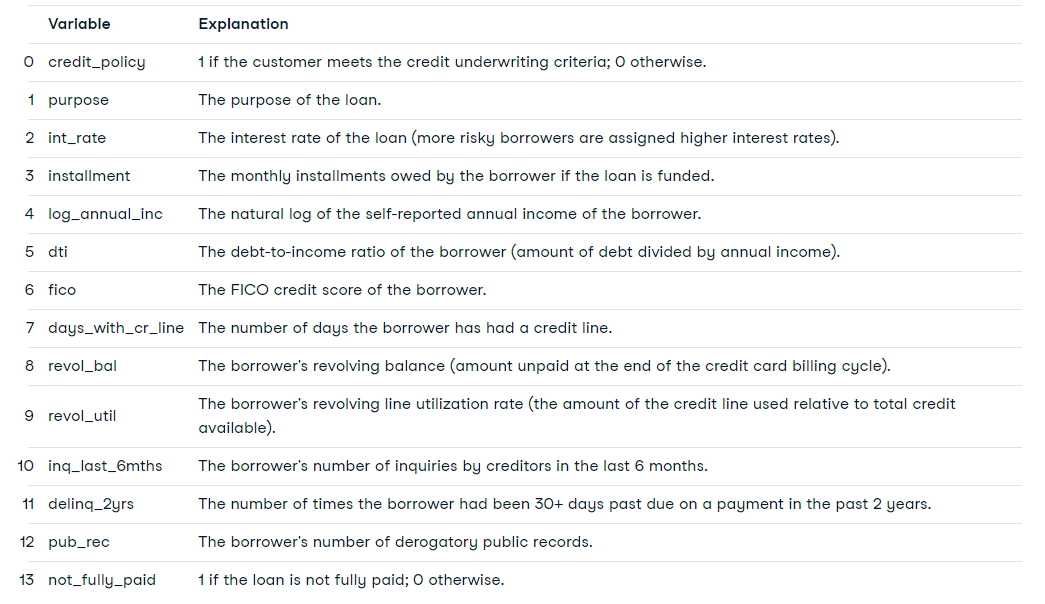

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


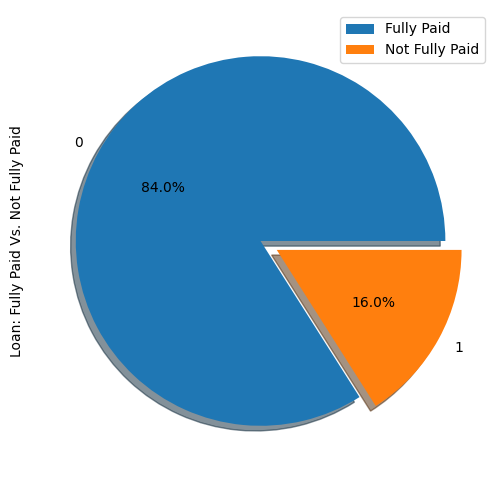

In [2]:
# Visualize the proportion of borrowers
def show_loan_distrib(data):
    count = ""

    if isinstance(data, pd.DataFrame):
        count = data["not.fully.paid"].value_counts()
    else:
        count = data.value_counts()

    count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

    plt.ylabel("Loan: Fully Paid Vs. Not Fully Paid")
    plt.legend(["Fully Paid", "Not Fully Paid"])
    plt.show()

show_loan_distrib(loan_data)

In [ ]:
# Check for null values.
loan_data.isnull().sum()

In [ ]:
# Check column types
loan_data.dtypes

In [ ]:
print(loan_data['purpose'].value_counts())

In [ ]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose", drop_first=True)
encoded_loan_data.dtypes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']

#X = loan_data_undersample.drop('not.fully.paid', axis = 1)
#y = loan_data_undersample['not.fully.paid']

#X = X_SMOTE
#y = y_SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

#print(X.columns)
#print(X.head)

#print(X.shape)
#print(X_train.shape)
#print(X_test.shape)

logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

**Class Imbalance** occurs when one class is significantly more frequent than the other.

**Undersampling** the majority class is used to address imbalance.

In [ ]:
X_train_cp = X.copy()
X_train_cp['not.fully.paid'] = y

# Undersample the majority class
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]

y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)

show_loan_distrib(loan_data_undersample)

print(encoded_loan_data.shape)
print(loan_data_undersample.shape)

In [ ]:
X = loan_data_undersample.drop('not.fully.paid', axis = 1)
y = loan_data_undersample['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

**SMOTE** is a popular oversampling technique used to balance class distributions. It works by creating synthetic examples for the minority class rather than simply duplicating existing instances. These synthetic examples are generated by interpolating between existing instances of the minority class.

**SMOTE = Synthetic Minority Oversampling Technique**

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']

smote = SMOTE(sampling_strategy='minority')

X_SMOTE, y_SMOTE = smote.fit_resample(X,y)

# Visualize the proportion of borrowers
show_loan_distrib(y_SMOTE)

print(encoded_loan_data.shape)
print(loan_data_undersample.shape)
print(X_SMOTE.shape)
print(y_SMOTE.shape)

In [ ]:

X = X_SMOTE
y = y_SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

logistic_classifier = LogisticRegression()

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)

print(classification_report(y_test,y_pred))